In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## Machine Learning and Data Processing Worksheet 
Once you have gathered your datasets you can import them into this work sheet. This work sheet will help you load a dataset, look at your data and train models on it. As there are some quite challenging concepts, some of the code is written for you. Fill in where you can, and try understand what is happening. Can you increase model accuracy? 

### Load in the data

First we load in the data, this is the chode you need to do it, then you can view the data with ```df.head()``` showning the top 5 in the table. df can be called anything, it is just the variable name. 
We have placed in some demo data from <a href="https://www.kaggle.com/datasets/letmecook123/mpu6050-body-movement-dataset-walking-running-idle">this kaggle site</a>

In [43]:
df=pd.read_csv("demos/1/walking.csv", header=None) 
df.columns = ["ax", "ay", "az", "gx", "gy", "gz"] #as there are no keys in the file add them
df.head() #show the top of the file

,ax,ay,az,gx,gy,gz
0,-4819,-3500,-8004,-157,-428,253
1,-3863,-3848,-8692,-486,-948,594
2,-3327,-4152,-9060,-163,-1143,1205
3,-3215,-3988,-8632,4,-801,1292
4,-3995,-4052,-8224,-214,-433,827


### Visualise the data

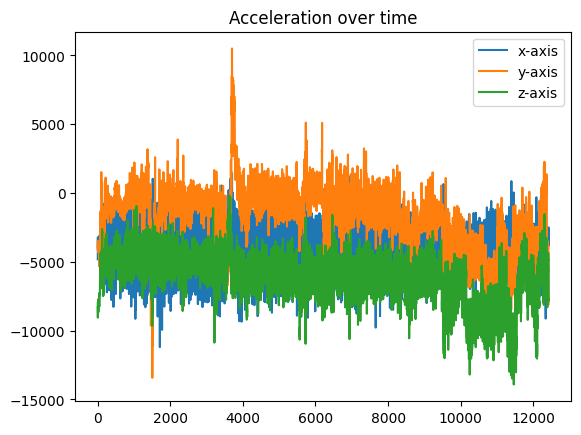

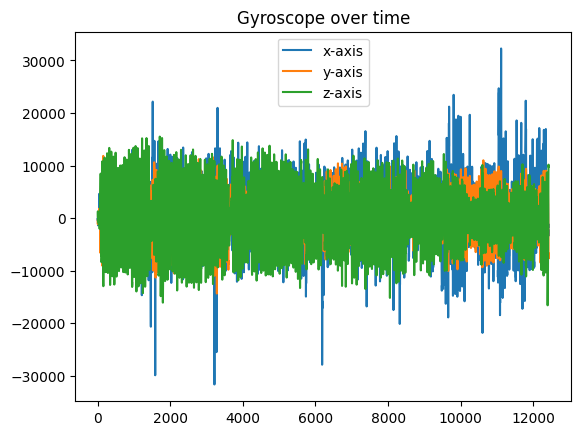

In [44]:
#plot the data
plt.plot(df['ax'],label="x-axis")
plt.plot(df['ay'],label="y-axis")
plt.plot(df['az'],label="z-axis")
plt.title("Acceleration over time")
plt.legend()
plt.show()

plt.plot(df['gx'],label="x-axis")
plt.plot(df['gy'],label="y-axis")
plt.plot(df['gz'],label="z-axis")
plt.title("Gyroscope over time")
plt.legend()
plt.show()


### Preparing your data and labelling it
To use this data we will need to know what class each csv file is. WE will go through the datafiles as a list of pathways, and list of labels... you will need to fill this out.

Once this is done the code will automatically label it into a dataset

In [45]:
files = ["demos/1/walking.csv","demos/1/running.csv","demos/1/idle.csv"] #this is just an example, put the names of your files in and paths to the files
labels = ["walking","running","idle"] #this is an example of classes, put the name of the action happening

In [46]:
#converter code
def convert_data(files,labels):
    X=[]
    label_to_id = {label: i for i, label in enumerate(labels)}
    y=[]
    min_length=np.inf
    for i in range(len(files)):
        temp=pd.read_csv(files[i], header=None) 
        temp.columns = ["ax", "ay", "az", "gx", "gy", "gz"] #as there are no keys in the file add them
        x=temp.to_numpy()
        if len(x)<min_length: min_length=len(x)
        X.append(x)
        y.append(label_to_id[labels[i]])
    #now this has been converted to the loaded data, but we want to make sure the readings are similar length
    X_new=[]
    for i in range(len(X)):
        X_new.append(X[i][0:min_length]) #convert to same length
    return np.array(X_new),np.array(y)

X_data,y_data=convert_data(files,labels)
#we scale the data too
X_data=(X_data-np.min(X_data))/(np.max(X_data)-np.min(X_data))
print("Dataset shapes",X_data.shape,y_data.shape)

Dataset shapes (3, 12355, 6) (3,)


### Machine Learning
Now we can classify our time series data which has been converted into datasets. Make sure to install tensorflow so you can use the library 

```[bash]
pip install --upgrade pip
pip install tensorflow

```
https://www.tensorflow.org/install

In [47]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
tf.config.optimizer.set_jit(False)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [48]:
n_timesteps = X_data.shape[1]
n_channels  = X_data.shape[2]
n_classes   = len(np.unique(y_data))
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_timesteps, n_channels)),
    Dropout(0.3),

    LSTM(64),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dense(n_classes, activation="softmax")
])

model.compile(
    optimizer=Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

/its/home/drs25/miniconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 12355, 64)      │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12355, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,379 (208.51 KB)

 Trainable params: 53,379 (208.51 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [49]:
history = model.fit(
    X_data, y_data,
    epochs=10,
    batch_size=32,
    validation_split=0,
    shuffle=True
)
loss, acc = model.evaluate(X_data, y_data, verbose=0)
print("Model Accuracy:", acc*100,"%")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.3333 - loss: 1.1325
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.3333 - loss: 1.0964
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.3333 - loss: 1.1047
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.0000e+00 - loss: 1.1458
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.3333 - loss: 1.1152
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.6667 - loss: 1.0731
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.0000e+00 - loss: 1.0995
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.3333 - loss: 1.1051
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.0000e+00 - loss: 1.1107
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.6667 - loss: 1.0813
Model Accuracy: 66.66666865348816 %


### Evaluate the model
How do we know the model is doing well? We look at how many correct and incorrect predictions it made. The labels show what it should be and what it predicted. Ideally it should have correct predictions on a diagonal trend down the middle. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


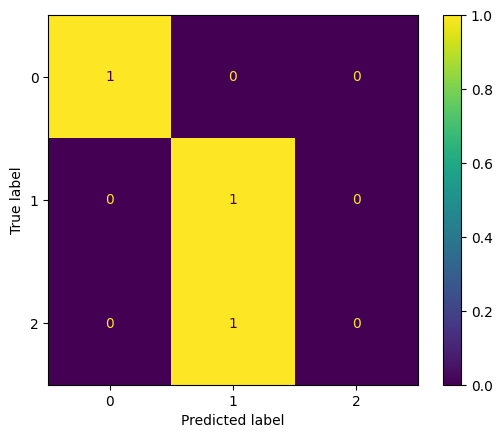

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

y_pred_probs = model.predict(X_data)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_data, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()